In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import sys
sys.path.append(os.path.join(os.getcwd(), '..', 'utils'))
from compute_tau import compute_tau_star
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()
sns.set_style("whitegrid",  {"grid.linewidth": 0.6})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
figsize = (8, 6)
cmap = plt.get_cmap("tab10")
cmap2 = plt.get_cmap("tab20")
fig_dir = os.path.join(os.getcwd(), 'stability_figs')
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
ss= 250
ms=15
ms2=20
ls=20
fs=30
fs2=24
lsp=0.1
htp=.1
ms3=.5
verbose=True
show=True
save=True
lw=4
frameon=False

## Game and Derivatives

In [2]:
v = 4
A = np.array([[-v, 0], [0, .5*v]])
B = np.array([[-v, 0], [0, 0.5*v]])
C = np.array([[-v, 0], [0, .5*v]])
D = np.array([[-.5*v, 0], [0, -v]])
M = np.vstack((np.hstack((A, B)), np.hstack((C, D))))

def d1f1_func(x, y):
    return A@x + .5*B@y + .5*C@y

def d2f2_func(x, y):
    return -D@y - .5*B@x - .5*C@x

## Run Dynamics

In [3]:
num_epochs = 20000
freq = 5000
learning_rate = .0005
tau_list = [2, 2.5, 3, 5, 10]

trajectories = []

for tau in tau_list:

    trajectory = []
    x = np.array([5, 4]).reshape(-1, 1)
    y = np.array([3, 2]).reshape(-1, 1)

    z = np.concatenate([x, y]).flatten()    
    trajectory.append(z)

    start = time.time()

    for epoch in range(1, num_epochs+1):

        d1f1 = d1f1_func(x, y)
        d2f2 = d2f2_func(x, y)

        x = x - learning_rate * d1f1
        y = y - tau*learning_rate * d2f2

        z = np.concatenate([x, y]).flatten()
        trajectory.append(z)

        if verbose:
            if epoch % freq == 0:
                print(epoch, z)

    trajectory = np.vstack(trajectory)
    trajectories.append(trajectory)
    end = time.time()

    if verbose:
        print('Finished in {:.2f} Seconds'.format(end-start))

5000 [-8.63337666e+00  2.69087390e-04  4.60066999e+00  2.68489225e-04]
10000 [ 9.53276806e+00  1.21215376e-08 -1.08588467e+01  1.21213587e-08]
15000 [-7.35048184e+00  5.44841925e-13  1.37123886e+01  5.44841871e-13]
20000 [ 2.73389560e+00  2.44893353e-17 -1.21646086e+01  2.44893353e-17]
Finished in 0.39 Seconds
5000 [-2.06605645e+00  6.16547711e-04  4.21737678e+00  4.77981069e-04]
10000 [-5.60959831e-01  8.54325903e-08  3.42652830e-02  6.62320538e-08]
15000 [ 1.35657915e-01  1.18380524e-11 -3.52401048e-01  9.17751081e-12]
20000 [ 5.64020185e-02  1.64035157e-15 -2.68301625e-02  1.27169097e-15]
Finished in 0.36 Seconds
5000 [3.22190423e-03 8.64135923e-04 9.13302990e-01 6.02496615e-04]
10000 [-3.41787880e-02  1.77000748e-07  1.07136463e-01  1.23409234e-07]
15000 [-4.80929379e-03  3.62550195e-11  8.67966918e-03  2.52778828e-11]
20000 [-4.36852761e-04  7.42610669e-15  4.73620550e-04  5.17766250e-15]
Finished in 0.37 Seconds
5000 [ 0.00519074  0.00138456 -0.0116223   0.00082364]
10000 [-4.335

## Plot Trajectories

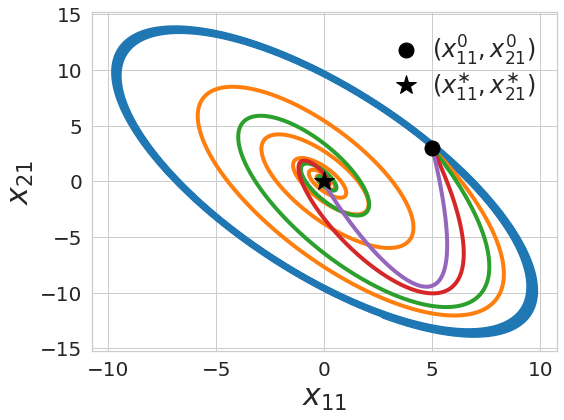

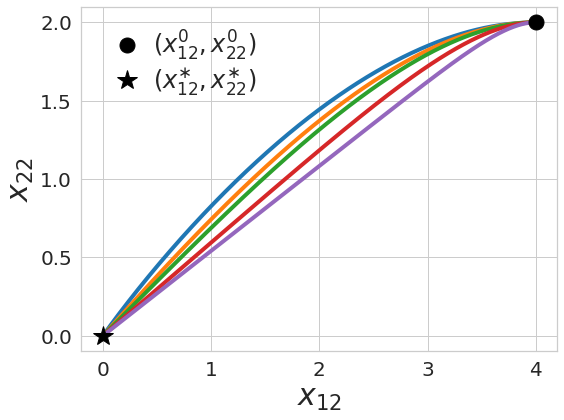

In [4]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
for i, trajectory in enumerate(trajectories):
    ax.plot(trajectory[:, 0], trajectory[:, 2], color=cmap(i), lw=lw)
ax.plot(trajectory[0, 0], trajectory[0, 2], color='black', marker='o', markersize=ms, ls='none', label=r'$(x_{11}^{0}, x_{21}^{0})$')
ax.plot(0, 0, color='black', marker='*', markersize=ms2, ls='none', label=r'$(x_{11}^{\ast}, x_{21}^{\ast})$')
ax.set_xlabel('$x_{11}$', fontsize=fs)
ax.set_ylabel('$x_{21}$', fontsize=fs)
ax.tick_params(labelsize=ls)
plt.legend(fontsize=fs2, labelspacing=lsp, frameon=frameon, handletextpad=htp, loc='upper right')
plt.tight_layout()
if save:
    plt.savefig(os.path.join(fig_dir, 'simgrad_x1_y1.png'), bbox_inches='tight')
if show:
    plt.show()

fig, ax = plt.subplots(1, 1, figsize=figsize)
for i, trajectory in enumerate(trajectories):
    ax.plot(trajectory[:, 1], trajectory[:, 3], color=cmap(i), lw=lw)
ax.plot(trajectory[0, 1], trajectory[0, 3], color='black', marker='o', markersize=ms, ls='none', label=r'$(x_{12}^{0}, x_{22}^{0})$')
ax.plot(0, 0, color='black', marker='*', markersize=ms2, ls='none', label=r'$(x_{12}^{\ast}, x_{22}^{\ast})$')
ax.set_xlabel('$x_{12}$', fontsize=fs)
ax.set_ylabel('$x_{22}$', fontsize=fs)
ax.tick_params(labelsize=ls)
plt.legend(fontsize=fs2, labelspacing=lsp, frameon=frameon, handletextpad=htp)
plt.tight_layout()
if save:
    plt.savefig(os.path.join(fig_dir, 'simgrad_x2_y2.png'), bbox_inches='tight')
if show:
    plt.show()

## Plot Distance to Equilibria

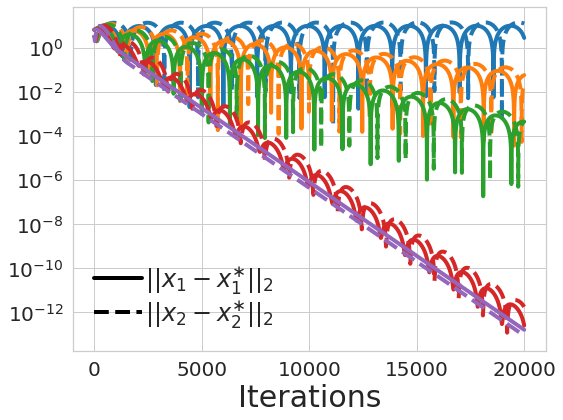

In [5]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
for i, trajectory in enumerate(trajectories):
    ax.plot(np.linalg.norm(trajectory[:, :2], axis=1), color=cmap(i), lw=lw)
    ax.plot(np.linalg.norm(trajectory[:, 2:], axis=1), color=cmap(i), linestyle='--', lw=lw)
ax.set_yscale('log')
ax.set_xlabel('Iterations', fontsize=fs)
ax.tick_params(labelsize=ls)
ax.plot([], [], color='black', label=r'$||x_1-x_1^{\ast}||_2$', ls='-', lw=lw)
ax.plot([], [], color='black', label=r'$||x_2-x_2^{\ast}||_2$', ls='--', lw=lw)
plt.legend(fontsize=fs2, labelspacing=lsp, frameon=frameon, handletextpad=htp, loc='lower left')
plt.tight_layout()
if save:
    plt.savefig(os.path.join(fig_dir, 'simgrad_norm.png'), bbox_inches='tight')
if show:
    plt.show()

## Plot Eigenvalues

In [6]:
save=False

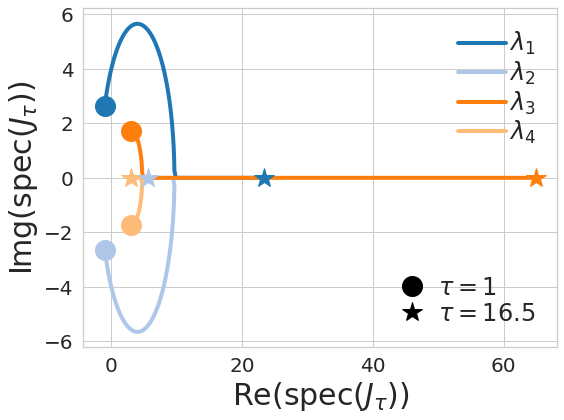

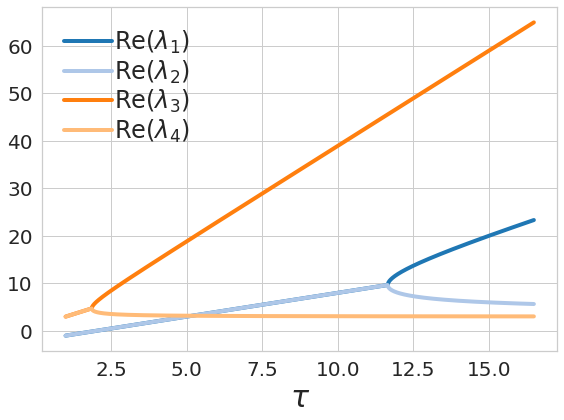

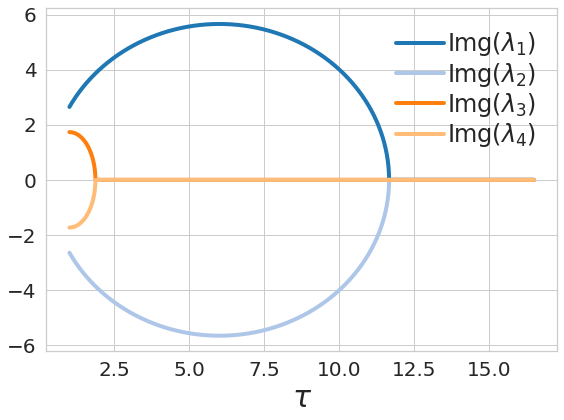

In [18]:
tau_min = 1
tau_max = 16.5
tau_step = .01
tau_sweep = np.arange(tau_min, tau_max, tau_step)
eigs = [[.25*v*((tau-2)+np.sqrt(np.complex(4-12*tau+tau**2))), .25*v*((tau-2)-np.sqrt(np.complex(4-12*tau+tau**2))), 
         .25*v*((2*tau+1)+np.sqrt(np.complex(1-8*tau+4*tau**2))), .25*v*((2*tau+1)-np.sqrt(np.complex(1-8*tau+4*tau**2)))] 
        for tau in tau_sweep]
eigs = np.vstack(eigs)

fig, ax = plt.subplots(1, 1, figsize=figsize)

counter = 4
for i in range(eigs.shape[1]):
    ax.plot(np.real(eigs[:, i]), np.imag(eigs[:, i]), '-', lw=lw, color=cmap2(i), markersize=ms3, label=r'$\lambda_%d$'%(i+1))
    ax.plot(np.real(eigs[0, i]), np.imag(eigs[0, i]), color=cmap2(i), marker='o', markersize=ms2, zorder=counter)
    ax.plot(np.real(eigs[-1, i]), np.imag(eigs[-1, i]), color=cmap2(i), marker='*', markersize=ms2, zorder=counter)
    counter -= 1

ax.set_ylabel(r'Img(spec($J_{\tau}$))', fontsize=fs)
ax.set_xlabel(r'Re(spec($J_{\tau}$))', fontsize=fs)
ax.tick_params(labelsize=ls)
legend1 = ax.legend(fontsize=fs2, labelspacing=lsp, frameon=frameon, handletextpad=htp)

l1, = ax.plot([], [], color='black', ls='none', marker='o', markersize=ms2)
l2, = ax.plot([], [], color='black', ls='none', marker='*', markersize=ms2)
legend2 = ax.legend([l1, l2], [r'$\tau=$'+str(tau_min), r'$\tau=$'+str(tau_max)], fontsize=fs2, labelspacing=lsp, frameon=frameon, handletextpad=htp, loc='lower right')

ax.add_artist(legend1)
plt.tight_layout()

if save:
    plt.savefig(os.path.join(fig_dir, 'tau_eig_sweep1.png'), bbox_inches='tight')
if show:
    plt.show()
    
fig, ax = plt.subplots(1, 1, figsize=figsize)

for i in range(eigs.shape[1]):
    ax.plot(tau_sweep, np.real(eigs[:, i]), '-', lw=lw, color=cmap2(i), markersize=ms3, label=r'Re($\lambda_%d$)'%(i+1))

ax.set_xlabel(r'$\tau$', fontsize=fs)
ax.tick_params(labelsize=ls)
ax.legend(fontsize=fs2, labelspacing=lsp, frameon=frameon, handletextpad=htp)
plt.tight_layout()

if save:
    plt.savefig(os.path.join(fig_dir, 'tau_eig_sweep2.png'), bbox_inches='tight')
if show:
    plt.show()
    
    
fig, ax = plt.subplots(1, 1, figsize=figsize)

for i in range(eigs.shape[1]):
    ax.plot(tau_sweep, np.imag(eigs[:, i]), '-', lw=lw, color=cmap2(i), markersize=ms3, label=r'Img($\lambda_%d)$'%(i+1), ls='-')
ax.set_xlabel(r'$\tau$', fontsize=fs)
ax.tick_params(labelsize=ls)
ax.legend(fontsize=fs2, labelspacing=lsp, frameon=frameon, handletextpad=htp)
plt.tight_layout()

if save:
    plt.savefig(os.path.join(fig_dir, 'tau_eig_sweep3.png'), bbox_inches='tight')
if show:
    plt.show()

## Compute $\tau^{\ast}$

In [11]:
# Jacobian at (0,0,0,0)
J = np.array([[-v, 0, -v, 0], [0, .5*v, 0, .5*v], [v, 0, 0.5*v, 0], [0, -.5*v, 0, v]])
m = 2
n = 2
# Theoretical value matches empirical value
print('tau* =', compute_tau_star(J, m, n))

tau* = 2.0
